In [84]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from calendar import monthrange

In [108]:
axes_style =   {            'grid' : 'True',
                       'labelsize' : '20',
                        'labelpad' : '8.0' }

xtick_style =  {       'direction' : 'out',
                       'labelsize' : '18.',
                      'major.size' : '5.',   
                     'major.width' : '1.',
                   'minor.visible' : 'True',
                      'minor.size' : '2.5',
                     'minor.width' : '1.' }

ytick_style =  {       'direction' : 'out',
                       'labelsize' : '18.',
                      'major.size' : '5',   
                     'major.width' : '1.',
                   'minor.visible' : 'True',
                      'minor.size' : '2.5',
                     'minor.width' : '1.' }

grid_style =   {           'alpha' : '0.75' }
legend_style = {        'fontsize' : '16' }
font_syle =    {            'size' : '20',
                          'family' : 'sans-serif' }
text_style =   {          'usetex' : 'True' }
# math_style =   {         'fontset' : 'cm' }
figure_style = {  'subplot.hspace' : '0.05' }

mpl.rc(    'font', **font_syle )
mpl.rc(    'text', **text_style )
# mpl.rc('mathtext', **math_style )
mpl.rc(    'axes', **axes_style )
mpl.rc(   'xtick', **xtick_style )
mpl.rc(   'ytick', **ytick_style )
mpl.rc(    'grid', **grid_style )
mpl.rc(  'legend', **legend_style )
mpl.rc(  'figure', **figure_style )

mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

### Over entire set (Scaled if set doesn't contain full year)

Using 2018 Data:
Threshold for  1 Event(s)/year: 6.420
Threshold for  3 Event(s)/year: 6.200
Threshold for  6 Event(s)/year: 5.960
Threshold for 12 Event(s)/year: 5.840
Threshold for 24 Event(s)/year: 5.570

Using 2019 Data:
Threshold for  1 Event(s)/year: 6.330
Threshold for  3 Event(s)/year: 5.950
Threshold for  6 Event(s)/year: 5.810
Threshold for 12 Event(s)/year: 5.730
Threshold for 24 Event(s)/year: 5.640



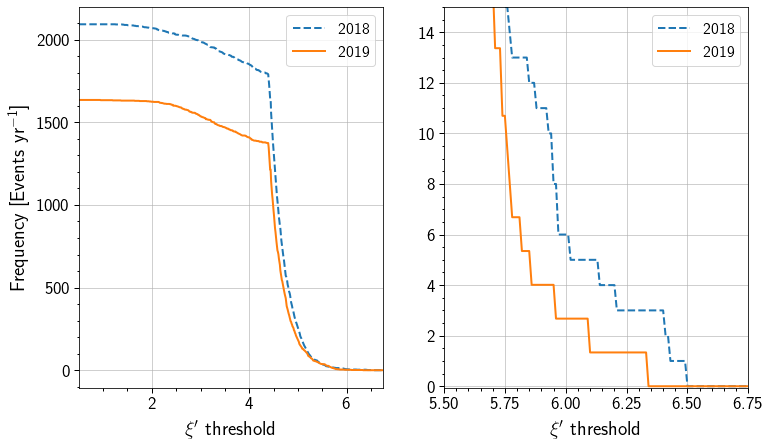

In [202]:

fig, ax = plt.subplots(1,2, figsize = (12,7))
for file in ['sndaq_alerts_2018.txt', 'sndaq_alerts_2019.txt']:
    sig_cor = []
    date = []
    if file[13:17]  == '2018':
        ls = '--'
        offset = 2.5
    else:
        ls = '-'
        offset = 0
    with open('../data/'+file) as f:
        f.readline()
        for line in f:
            sig_cor.append(float(line.split()[0]))
            date.append(line.split()[3].split('-'))

    sig_cor = np.asarray(sig_cor)
    date = np.asarray(date, dtype = int)

    thresholds = np.linspace(0.5, 8.5, 801)
    freq = np.zeros_like(thresholds)
    for i, threshold in enumerate(thresholds):
        cut = sig_cor > threshold
        freq[i] = sig_cor[cut].size 

    days = 0
    for month in range(1, date[-1, 1]+1):
        days += monthrange(date[-1][0], month)[1]    

    freq *= 365/days

    ax[0].plot(thresholds, freq, lw = 2, ls = ls, label=file[13:17])
    ax[1].plot(thresholds, freq, lw = 2, ls = ls, label=file[13:17])
    
    print('Using {} Data:'.format(file[13:17]))
    for n in [1,3,6,12, 24]:
        print('Threshold for {0:2} Event(s)/year: {1:0.3f}'.format(
            n, thresholds[np.where(freq > n)[0][-1]]))
    print('')

ax[0].legend()
ax[0].set(xlabel = r'$\xi^\prime$ threshold', 
       ylabel = 'Frequency [Events yr$^{-1}$]',
       xlim = (0.5, 6.75));
ax[1].legend()
ax[1].set(xlabel = r'$\xi^\prime$ threshold',
       xlim = (5.5, 6.75),
       ylim = (-0.05, 15));

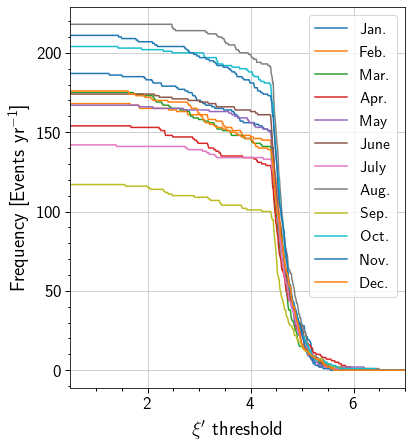

In [203]:
sig_cor = []
date = []
with open('../data/sndaq_alerts_2018.txt') as f:
    f.readline()
    for line in f:
        sig_cor.append(float(line.split()[0]))
        date.append(line.split()[3].split('-'))

sig_cor = np.asarray(sig_cor)
date = np.asarray(date, dtype = int)

count = np.zeros((12, thresholds.size))
month_strings = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May' , 'June',
                 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
fig, ax = plt.subplots(1, figsize = (6,7))
for i, (month, month_string) in enumerate(zip(range(12), month_strings)):
    cut_month = date[:,1] == month+1
    for j,threshold in enumerate(thresholds):
        cut_level = sig_cor[cut_month] > threshold
        count[i, j] = sig_cor[cut_month][cut_level].size
    ax.plot(thresholds, count[i], label = month_string)
    
ax.legend()

ax.set(xlabel = r'$\xi^\prime$ threshold', 
       ylabel = 'Frequency [Events yr$^{-1}$]',
       xlim = (0.5, 7));

Threshold for 1 Event(s)/Month: 5.84
Threshold for 2 Event(s)/Month: 5.57
Threshold for 3 Event(s)/Month: 5.48


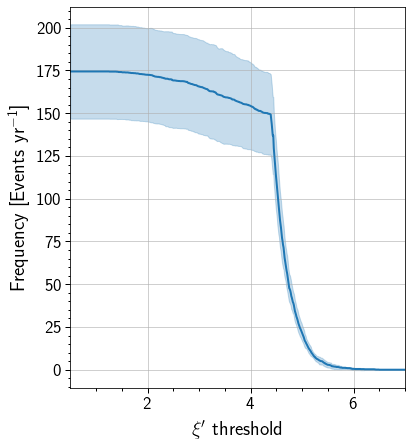

In [208]:
fig, ax = plt.subplots(1, figsize = (6,7))
avg = np.average(count, axis = 0)
std = np.std(count, axis = 0)


h = ax.plot(thresholds, avg, lw = 2)[0]
ax.fill_between(thresholds, avg-std, avg+std, alpha=0.25,  color = h.get_color())
ax.set(xlabel = r'$\xi^\prime$ threshold', 
       ylabel = 'Frequency [Events yr$^{-1}$]',
       xlim = (0.5, 7));
for n in range(1,4):
    print('Threshold for {0} Event(s)/Month: {1}'.format(
        n, thresholds[np.where(avg > n)[0][-1]]))